#CODSOFT INTERNSHIP
TASK 1:PREDICTING TITANIC SURVIVAL

AUTHOR:ABINAYA.K

FIELD:DATASCIENCE

BATCH:SEPTEMBER

Aim:
The objective of this project is to build a predictive model using the Titanic dataset that can classify whether a passenger survived the Titanic disaster or not, based on various factors such as their age, gender, passenger class, fare, number of siblings/spouses aboard, and port of embarkation. This project aims to explore and apply fundamental data science techniques including data preprocessing, feature engineering, model building, and evaluation using machine learning algorithms.

1.Loading and preparing data

In [15]:
import pandas as pd

# Load the dataset
titanic_df = pd.read_csv('/content/sample_data/Titanic-Dataset (1).csv')

# Drop irrelevant columns
titanic_df = titanic_df.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"])

# Convert "Sex" to numeric values
titanic_df["Sex"] = titanic_df["Sex"].map({"male": 0, "female": 1})

# Handle missing values in "Embarked" with the most common value
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0], inplace=True)

# Define features and target variable
X = titanic_df.drop(columns=["Survived"])
y = titanic_df["Survived"]

# Display the first few rows of the dataset
print(titanic_df.head())





   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500     None
1         1       1    1  38.0      1      0  71.2833     None
2         1       3    1  26.0      0      0   7.9250     None
3         1       1    1  35.0      1      0  53.1000     None
4         0       3    0  35.0      0      0   8.0500     None


<ipython-input-15-51f93474cbf1>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0], inplace=True)


2.Define Preprocessing model

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numeric columns
    ('scaler', StandardScaler())  # Scale numeric columns
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values in categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

# Combine preprocessing steps for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', LogisticRegression(max_iter=1000))  # Use Logistic Regression as classifier
])



3.Splitting Data and train

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)  # Features
y = titanic_df['Survived']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')


Model accuracy: 0.80


4.VISUALIZATION

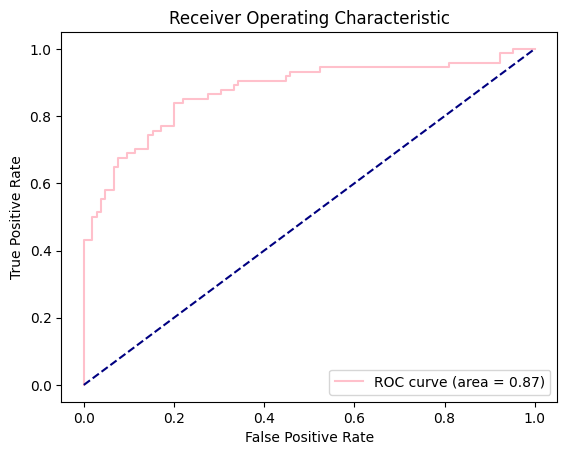

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='PINK', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
